# Homework 1

Created by: Frendy

Date: 9/7/2020

The image folder has the images given for the homework

The output folder has the images that were created for the homework (Example: image1_crop.jpg)

# Dependencies

Please have the common libraries listed belowed installed.

In case you don't have it. Please install it by typing the following

## matplotlib
pip3 install matplotlib

## scipy
pip3 install scipy

## numpy
pip3 install numpy


In [1]:
############
# Numpy makes my computer run out of memory, fix it by forcing to not do multi threading
###########
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

In [2]:

import matplotlib.image as image
import matplotlib.pyplot as plot

from scipy import ndimage, linalg

import numpy as np

from PIL import Image

Displaying image1


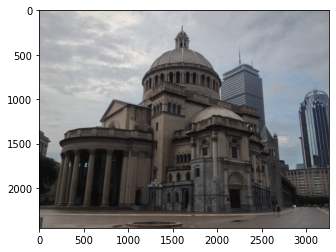

Displaying image2


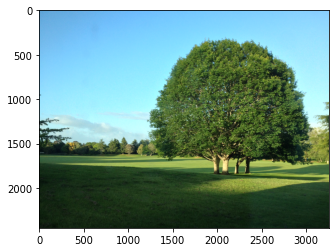

In [3]:
#########################
# Problem 4 a
#########################
image_1 = image.imread('images/image1.jpg')
image_2 = image.imread('images/image2.jpg')

print("Displaying image1")
plot.imshow(image_1)
plot.show()

print("Displaying image2")
plot.imshow(image_2)
plot.show()

Saving image1_crop.jpg


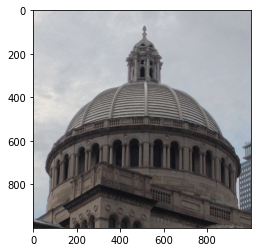

Saving image1_crop_rotated.jpg


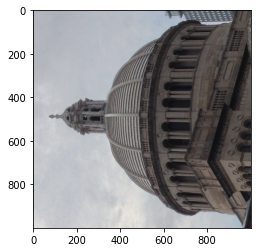

Saving image2_pasted.jpg


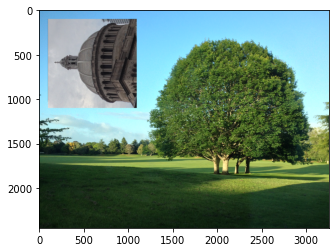

In [4]:
#########################
# Problem 4 b
#########################
#(height, width, depth/colors)
# Top to bottom
# Left to right (top left is 0,0)

#print(image_1.shape)

######################
# Cropping
#####################

crop_1 = image_1[100:1100, 1100:2100]

#print(crop_1.shape)

plot.imshow(crop_1)


print("Saving image1_crop.jpg")
plot.savefig('output/image1_crop.jpg')
plot.show()
######################
# Rotating
#####################
# scipy.ndimage.rotate(input, angle, axes=1, 0, reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)[source]
rotate_1 = ndimage.rotate(crop_1,90)

plot.imshow(rotate_1)


print("Saving image1_crop_rotated.jpg")
plot.savefig('output/image1_crop_rotated.jpg')
plot.show()

######################
# Pasting
#####################
## Make it as an numpy array so that we can say pixels 100 100 is the rotated image
## Tried to do it normaly, but it said that it was read only; thus, the reason why is a numpy array now
paste_2 = np.array(image_2)
paste_2[100: 1100, 100: 1100] = rotate_1

plot.imshow(paste_2)

print("Saving image2_pasted.jpg")
plot.savefig('output/image2_pasted.jpg')
plot.show()

Resizing Image 1


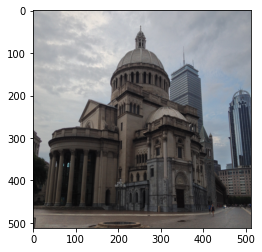

Resizing Image 2


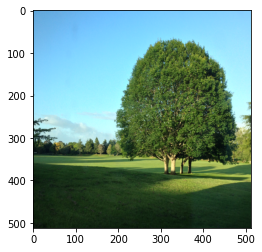

Combining images
Saving image12_composited.jpg


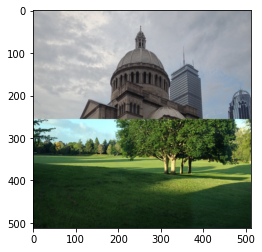

In [5]:
#########################
# Problem 4 c
#########################
new_size = [512, 512]

print("Resizing Image 1")
resize_image_1 =Image.open('images/image1.jpg').resize(new_size)
plot.imshow(resize_image_1)
plot.show()

print("Resizing Image 2")
resize_image_2 =Image.open('images/image2.jpg').resize(new_size)
plot.imshow(resize_image_2)
plot.show()

print("Combining images")
top = np.array(resize_image_1)
bottom = np.array(resize_image_2)
bottom[0:256, 0:512] = top[0:256, 0:512]
plot.imshow(bottom)


print("Saving image12_composited.jpg")
plot.savefig('output/image12_composited.jpg')
plot.show()

Display grayscale image of svd_test


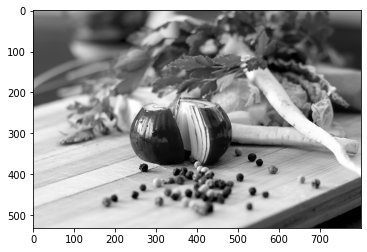

In [6]:
#########################
# Problem 5 a
#########################
# If I use matplotlib.image.imread I would need to multiply the colors to get a gray
# Instead use Image.open 'LA' convert function to grayscale
# L makes it look green for some reason..

print("Display grayscale image of svd_test")
problem_5 = Image.open('images/svd_test.jpg').convert('LA')
plot.imshow(problem_5)
plot.show()

In [7]:
#########################
# Problem 5 b
#########################
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
# svd_test is a 3d array, I will use mean to make it as a 2d array
matrix = np.mean(problem_5, 2)

U, s ,Vh  = np.linalg.svd(matrix)

#s is the 1D array of the image matrix singular values
# Thus,it means that the size of s is the rank of the image 
print("The rank of the image matrix is:", str(s.shape))

The rank of the image matrix is: (531,)


=========== Rank n=1 approximation: ===========


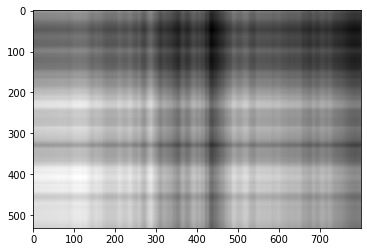

=========== Rank n=5 approximation: ===========


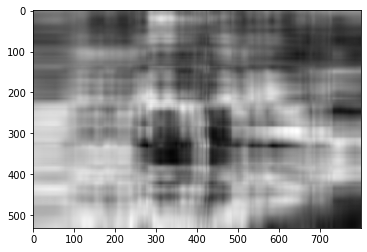

=========== Rank n=20 approximation: ===========


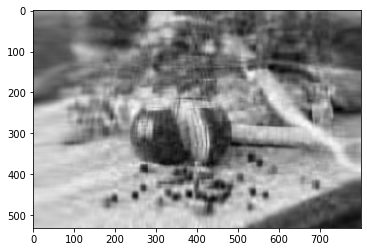

=========== Rank n=100 approximation: ===========


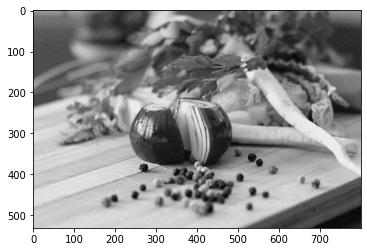

In [20]:
#########################
# Problem 5 c
##########################
S = np.diag(s)
for i in (1, 5, 20, 100):
    Approx = U[:,:i] @ S[0:i, :i] @ Vh[:i, :]
    print("=========== Rank n=" + str(i) + " approximation: ===========")
    plot.imshow(Approx, cmap='gray')
    plot.savefig('output/rank_' + str(i) + '_approx.jpg')
    plot.show()